In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FOLDER = "../Bus_Stops/"
FILE_NAME = "ca_stops_revised.csv"
ca = pd.read_csv(f"{FOLDER}{FILE_NAME}")

# Keep route_type is 3 (bus stops) only
keep_row = [3]
ca1 = ca[ca.route_type.isin(keep_row)]
#ca1.route_type.value_counts()

# Keep useful columns only
keep_col = ['agency', 'stop_id', 'stop_name', 'x', 'y']
ca_clean = ca1[keep_col]

# Change stop_id type from object to string
ca_clean = (ca_clean.astype({'stop_id': str}))

In [ ]:
#ca_clean.dtypes

In [3]:
ca_clean.shape

(5404, 5)

In [ ]:
#ca_clean.info()

In [ ]:
#ca_clean.describe()

In [ ]:
# 5404-4909 = 495 duplicates (doesn not include the first one)

In [4]:
ca_clean["stop_id"].nunique()

4909

In [5]:
#chack how many dups are there, except the first one that appeared
id_dup = ca_clean["stop_id"].duplicated(keep='first')
id_dup.name = 'duplicate_id'
id_dup1 = pd.concat([ca_clean, id_dup], axis = 1)
#id_dup1.head()
#id_dup1.shape

id_dup1 = (id_dup1.astype({'duplicate_id': str}))

keep_row = ['True']
ca_id_dup = id_dup1[id_dup1.duplicate_id.isin(keep_row)]
ca_id_dup.shape
#ca_id_dup.head()
#ca_id_dup.stop_id.value_counts()

(495, 6)

#mark all duplicates, includes the first one
id_dup_all = ca_clean["stop_id"].duplicated(keep=False)
id_dup_all.name = 'duplicate_id'
id_dup_all1 = pd.concat([ca_clean, id_dup_all], axis = 1)
#id_dup_all1.head()

id_dup_all1 = (id_dup_all1.astype({'duplicate_id': str}))

keep_row = ['True']
ca_id_dup_all = id_dup_all1[id_dup_all1.duplicate_id.isin(keep_row)]
ca_id_dup_all = (ca_id_dup_all.astype({'stop_id': str}))

#ca_id_dup.stop_id.value_counts()
ca_id_dup_all.shape
#ca_id_dup_all = ca_id_dup_all.sort_values(by = ['stop_id'], ascending = False, ignore_index=True)
#ca_id_dup_all.head()

In [6]:
# count how many duplicate IDs each agency has
dup_by_agency = (ca_id_dup.groupby(['agency'])
        .agg({'stop_id': 'count'
              }
             ).reset_index()
        )
#dup_by_agency.head()
dup_by_agency = dup_by_agency.rename(columns = {'stop_id': 'dup_id_count'})
dup_by_agency = dup_by_agency.sort_values(by = ['dup_id_count'], ascending = False, ignore_index=True)
print(dup_by_agency)

                                               agency  dup_id_count
0                            North Lake Tahoe Express            68
1               Stanislaus Regional Transit Authority            48
2                     Victor Valley Transit Authority            39
3   Los Angeles County Metropolitan Transportation...            32
4         Santa Barbara Metropolitan Transit District            27
5                                  Long Beach Transit            25
6            Santa Cruz Metropolitan Transit District            24
7                       Marin County Transit District            21
8               San Diego Metropolitan Transit System            16
9              Orange County Transportation Authority            15
10          Imperial County Transportation Commission            14
11         San Luis Obispo Regional Transit Authority            14
12                                          OmniTrans            13
13                              City of Santa Cl

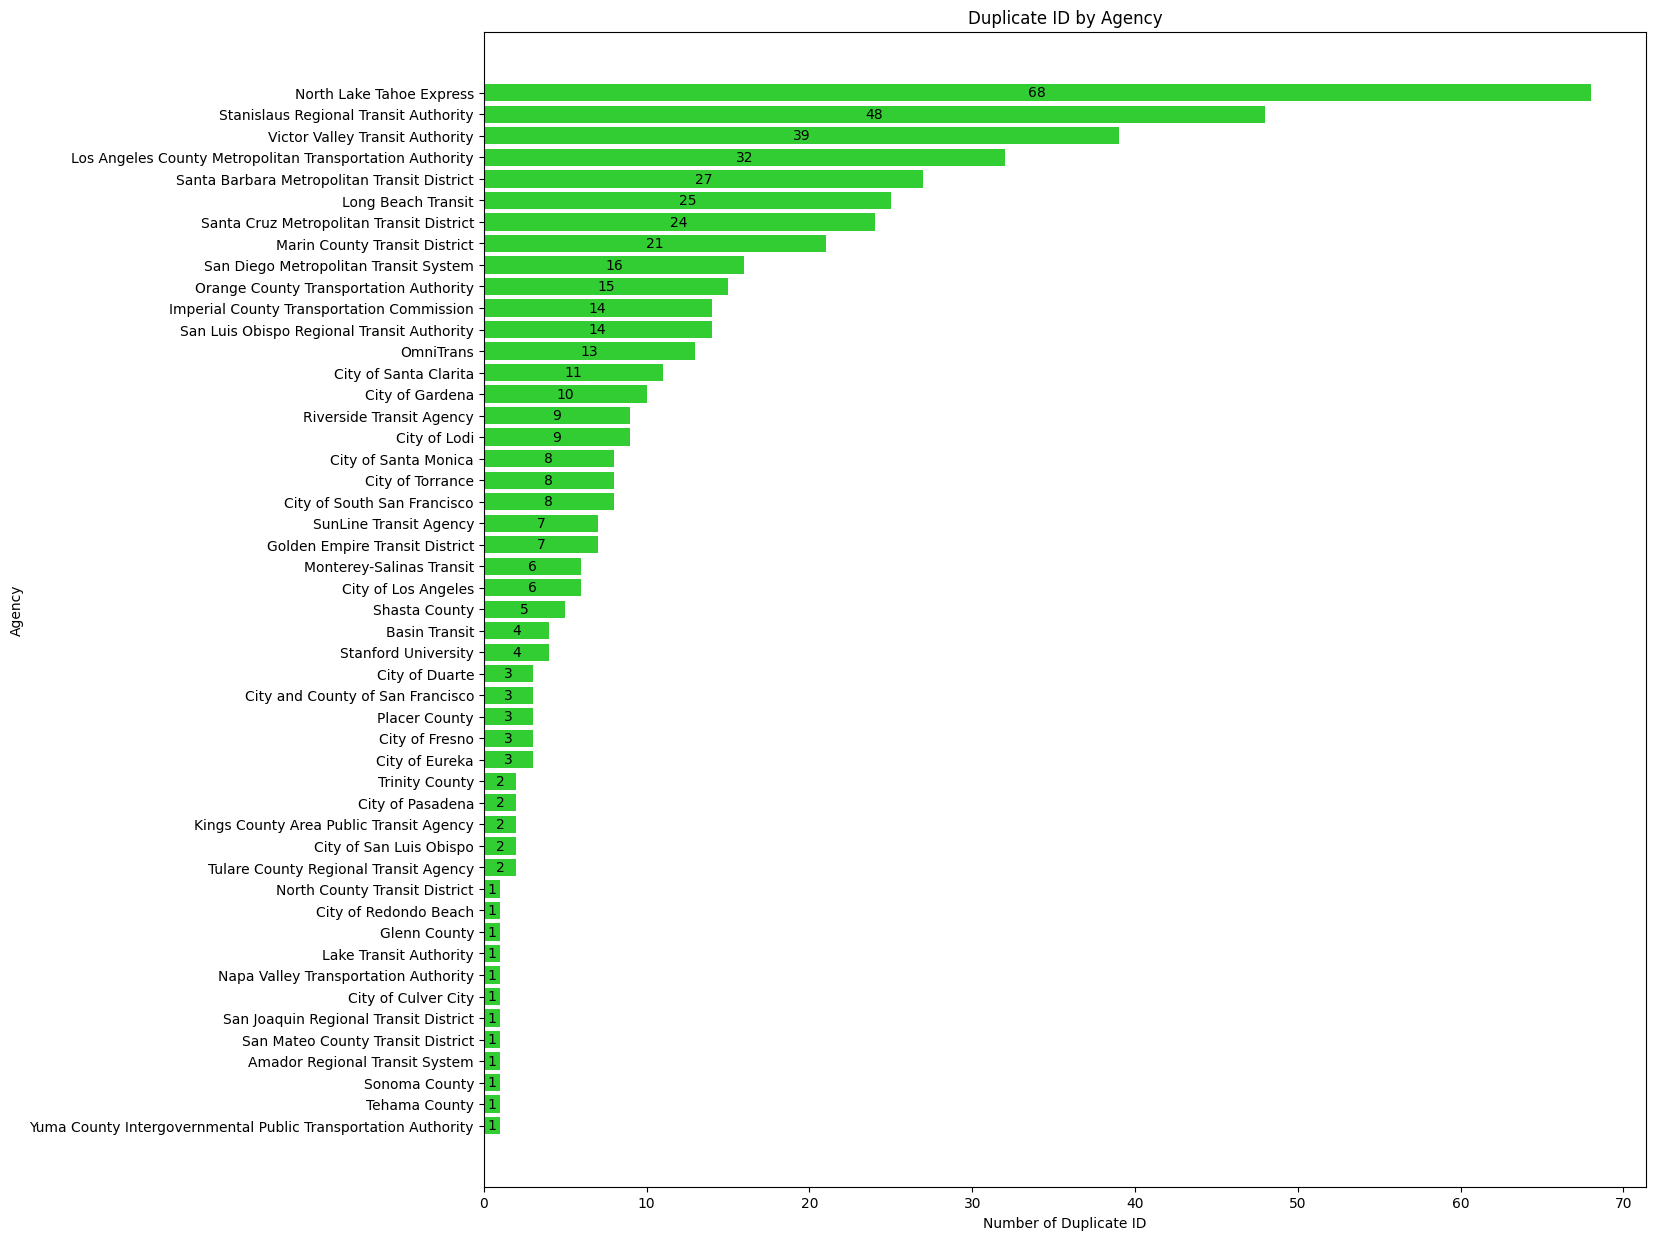

In [7]:
# plot how many duplicate IDs each agency has
dup_by_agency = dup_by_agency.sort_values(by = ['dup_id_count'], ascending = True, ignore_index=True)
#color = []
plt.figure(figsize = (15,15))
barplot = plt.barh(dup_by_agency.agency, dup_by_agency.dup_id_count, color = 'limegreen')

plt.xlabel('Number of Duplicate ID')
plt.ylabel('Agency')
plt.title('Duplicate ID by Agency')
plt.bar_label(barplot, labels = dup_by_agency.dup_id_count, label_type = 'center')
plt.show()

In [9]:
# how many invalid IDs there are. list them
invalid_id = ca_clean[ca_clean['stop_id'].str.contains('-')] 
invalid_id.shape

(142, 5)

In [11]:
invalid_id.head(10)

,agency,stop_id,stop_name,x,y
2243,Tulare County Regional Transit Agency,ca94efb0-8c9f-4471-8007-6d2e80606426,Delano Triangle Institute,-119.237171,35.761569
2336,Greyhound,24972fe9-f153-47e9-a63b-fbe8833c5e4e,Calexico Bus Station,-115.497015,32.665684
2903,City of Santa Maria,c5499e22-9a47-40b9-ae99-3481be7172f8,Western at Main (Inbound),-120.449411,34.953573
2904,City of Santa Maria,a2cb3f8f-d30e-459e-b21b-4f17d8b6d1cb,Main at College,-120.423650,34.952980
2905,City of Santa Maria,c93fecba-539c-4327-8c2c-fe97199c676a,Main at School (Outbound),-120.430225,34.953021
2906,City of Santa Maria,cd7d07ff-22ea-4c7e-aef6-d493e9835cc2,Main at Ranch,-120.419454,34.952913
2907,City of Santa Maria,ecdf34a1-3e5a-4585-a230-d7c44d14af3a,Main at Elizabeth (Inbound),-120.429124,34.953227
2996,Tulare County Regional Transit Agency,7a488139-7f63-4681-b086-023e5359cacb,Road 128 and School NB,-119.286704,36.524335
2997,Tulare County Regional Transit Agency,0a805200-407a-48a3-af10-b45977e3b04c,Ave 264 and Mooney SB,-119.313486,36.269066
2998,Tulare County Regional Transit Agency,f3f279e6-0cf4-433a-8f4b-d90770e71eef,Target,-119.313219,36.224097


#drop all duplicate IDs. Keep the first one
ca_del_dup = ca_id_dup.drop_duplicates(subset = 'stop_id', keep = 'first')
#ca_del_dup.shape
#dup_id_list = ca_del_dup['stop_id'].tolist()
#print(dup_id_list)

# how many stops each agency has biggest to small
stops_by_agency = (ca_clean.groupby(['agency'])
        .agg({'stop_id': 'count'
              }
             ).reset_index()
        )
stops_by_agency.sort_values(by = ['stop_id'], ascending = False)